In [3]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import re

In [1]:
#to maintain as much as possible, use feature engineering on the original dataframe, instead of dropping data I didn't know how to approach

train = pd.read_csv("./data/train.csv")
survived = pd.read_csv('./data/survived.csv')

survivalRate=train['Survived']
train.drop('Survived',axis=1,inplace=True)

encoded=pd.get_dummies(train['Sex'], prefix='sex')
train = pd.concat([train,encoded], axis=1)
train.drop('Sex', axis=1, inplace=True)

encoded=pd.get_dummies(train['Embarked'], prefix='embarked')
train = pd.concat([train,encoded], axis=1)
train.drop('Embarked', axis=1, inplace=True)

train

NameError: name 'pd' is not defined

In [154]:
import re
titles=train['Name'].tolist()
titlesList=[]

for s in titles:
    title = re.search(r"\b[A-Za-z]+\.\s?", s)
    if title.group() not in titlesList:
        titlesList.append(title.group())
titlesList

#re.search returns a match object, group returns the one or more matching subgroups of that  object

['Mr. ',
 'Mrs. ',
 'Miss. ',
 'Master. ',
 'Don. ',
 'Rev. ',
 'Dr. ',
 'Mme. ',
 'Ms. ',
 'Major. ',
 'Lady. ',
 'Sir. ',
 'Mlle. ',
 'Col. ',
 'Capt. ',
 'Countess. ',
 'Jonkheer. ']

In [205]:
def extract_title(name):
    title_search = re.search(r"\b[A-Za-z]+\.\s?", name)
    if title_search:
        return title_search.group(0).strip().rstrip('.')  # Extract and clean the title
    return ""

# Function to group titles
def groupTitles(x):
    title = extract_title(x['Name'])  # Extract the title from the name

    # List of titles to group into 'Mr'
    mr_titles = ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']
    # List of titles to group into 'Mrs'
    mrs_titles = ['Countess', 'Mme']
    # List of titles to group into 'Miss'
    miss_titles = ['Mlle', 'Ms']

    if title in mr_titles:
        return 'Mr'
    elif title in mrs_titles:
        return 'Mrs'
    elif title in miss_titles:
        return 'Miss'
    elif title == 'Dr':
        if x['sex_male'] == True:  # Corrected: Use x['Sex'] instead of column['Sex']
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title  # Return the original title if no grouping is needed

# Apply the function to the DataFrame
train['Grouped_Title'] = train.apply(groupTitles, axis=1)
train['Grouped_Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Lady', 'Sir'], dtype=object)

In [156]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [157]:
#a-e are first class
#F-G 2nd and 3rd class
#T is the tank top
#Unknown do not have cabins

#I could reencode decks, but im pretty sure some correlation exists between them and class.

cabin=train['Cabin']
cabin.unique()
for c in cabin:
    if type(c)==str and c[0] not in deckList:
        deckList.append(c[0])
deckList

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown']

In [206]:
#I guess I should experiment with the imputed 
from sklearn.impute import SimpleImputer
simple = SimpleImputer()
age_df=pd.DataFrame(train['Age'])
simple.fit(age_df)
age_imputed=simple.transform(age_df)
age_df=pd.DataFrame(age_imputed, columns=age_df.columns, index=age_df.index)
age_df.isna().sum()
train['Age']=age_df
train.isna().sum()

encoded_title=pd.get_dummies(train['Grouped_Title'],prefix='title')
train=pd.concat([train,encoded_title],axis=1)
train.drop('Grouped_Title',axis=1,inplace=True)
PassengerId=train['PassengerId'].copy()
train.drop('PassengerId', axis=1, inplace=True)

train

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Lady,title_Master,title_Miss,title_Mr,title_Mrs,title_Sir
0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True,False,False,False,True,False,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,True,False,True,False,False,False,False,False,False,True,False
2,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True,False,False,True,False,False,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,True,False,False,False,True,False,False,False,False,True,False
4,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,False,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,False,True,False,False,True,False,False,False,True,False,False
887,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,True,False,False,False,True,False,False,True,False,False,False
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,True,False,False,False,True,False,False,True,False,False,False
889,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,False,True,True,False,False,False,False,False,True,False,False


In [207]:
cabin_copy=train['Cabin'].copy()
ticket_copy=train['Cabin'].copy()
train.drop('Cabin',axis=1,inplace=True)
train.drop('Ticket',axis=1, inplace=True)
train.drop('Name',axis=1,inplace=True)
train['Age'] = train['Age'].astype(int)
train

,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Lady,title_Master,title_Miss,title_Mr,title_Mrs,title_Sir
0,3,22,1,0,7.2500,False,True,False,False,True,False,False,False,True,False,False
1,1,38,1,0,71.2833,True,False,True,False,False,False,False,False,False,True,False
2,3,26,0,0,7.9250,True,False,False,False,True,False,False,True,False,False,False
3,1,35,1,0,53.1000,True,False,False,False,True,False,False,False,False,True,False
4,3,35,0,0,8.0500,False,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,False,True,False,False,True,False,False,False,True,False,False
887,1,19,0,0,30.0000,True,False,False,False,True,False,False,True,False,False,False
888,3,29,1,2,23.4500,True,False,False,False,True,False,False,True,False,False,False
889,1,26,0,0,30.0000,False,True,True,False,False,False,False,False,True,False,False


np.int64(15)

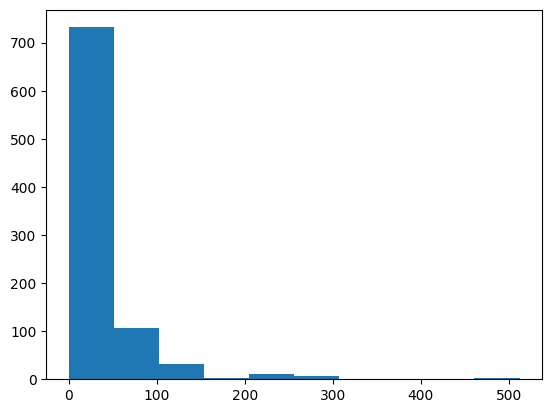

In [209]:
plt.hist(train['Fare'])
zero_count = train['Fare'].value_counts().get(0, 0)
zero_count

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <BarContainer object of 10 artists>)

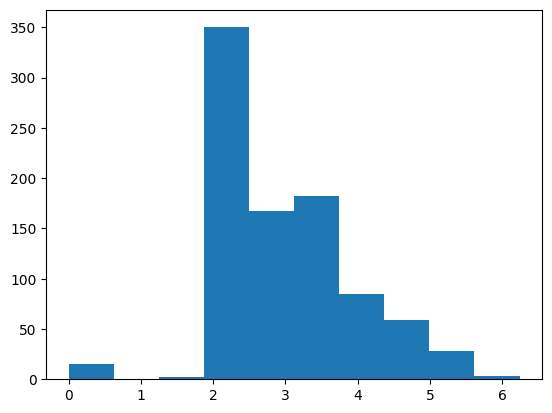

In [210]:
log_fare=np.log1p(train['Fare']) #apply log1p transformation for financial data , handles 0s gracefully
plt.hist(log_fare)

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <BarContainer object of 10 artists>)

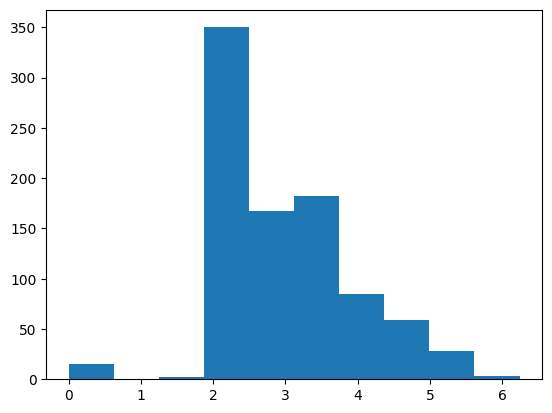

In [211]:
log_fare = log_fare.rename('log_fare')
train=pd.concat([train,log_fare],axis=1)
train.drop('Fare',axis=1,inplace=True)
plt.hist(log_fare)

In [39]:
train['Fare'].isna().sum()

np.int64(0)

In [38]:
key=pd.read_csv('./data/survived.csv')
key=key['Survived']
key

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

,Pclass,Age,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,family,Age*Class,Fare_Per_Person
0,3,34,False,True,False,True,False,False,False,True,False,0,102,2.178064
1,3,47,True,False,False,False,True,False,False,False,True,1,141,1.039721
2,2,62,False,True,False,True,False,False,False,True,False,0,124,2.369075
3,3,27,False,True,False,False,True,False,False,True,False,0,81,2.268252
4,3,22,True,False,False,False,True,False,False,False,True,2,66,0.862275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30,False,True,False,False,True,False,False,True,False,0,90,2.202765
414,1,39,True,False,True,False,False,False,False,False,True,0,39,4.699571
415,3,38,False,True,False,False,True,False,False,True,False,0,114,2.110213
416,3,30,False,True,False,False,True,False,False,True,False,0,90,2.202765


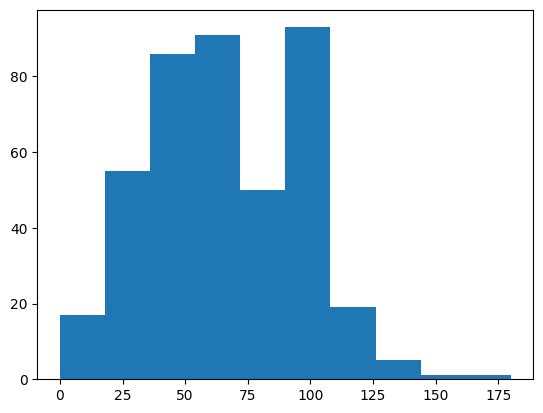

In [37]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import re
# Load the training and test datasets
test = pd.read_csv("./data/test.csv")
train = pd.read_csv('./data/train.csv')
survived = pd.read_csv('./data/survived.csv')

# Function to extract titles from names
def extract_title(name):
    title_search = re.search(r"\b[A-Za-z]+\.\s?", name)
    if title_search:
        return title_search.group(0).strip().rstrip('.')  
    return ""

# Function to group titles
def groupTitles(x):
    title = extract_title(x['Name'])  # Extract the title from the name

    mr_titles = ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir']
    mrs_titles = ['Countess', 'Mme', 'Dona', 'Lady']
    miss_titles = ['Mlle', 'Ms']

    if title in mr_titles:
        return 'Mr'
    elif title in mrs_titles:
        return 'Mrs'
    elif title in miss_titles:
        return 'Miss'
    elif title == 'Dr':
        if x['sex_male'] == True:  # Use the encoded 'sex_male' column
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title  

# Function to preprocess the data
def preprocess_data(df):

    encoded_sex = pd.get_dummies(df['Sex'], prefix='sex')
    df = pd.concat([df, encoded_sex], axis=1)
    df.drop('Sex', axis=1, inplace=True)

    encoded_embarked = pd.get_dummies(df['Embarked'], prefix='embarked')
    df = pd.concat([df, encoded_embarked], axis=1)
    df.drop('Embarked', axis=1, inplace=True)


    df['Grouped_Title'] = df.apply(groupTitles, axis=1)


    encoded_title = pd.get_dummies(df['Grouped_Title'], prefix='title')
    df = pd.concat([df, encoded_title], axis=1)
    df.drop('Grouped_Title', axis=1, inplace=True)


    age_imputer = SimpleImputer()
    age_imputed = age_imputer.fit_transform(df[['Age']])
    df['Age'] = age_imputed
    df['Age'] = df['Age'].astype(int)

    df['log_fare'] = np.log1p(df['Fare'])

    df['family']=df['SibSp'] + df['Parch']
    df['Age*Class']=df['Age']*df['Pclass']
    df['Fare_Per_Person']=df['log_fare']/(df['family']+1)    
    

    df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId','SibSp','Parch','Fare','log_fare'], axis=1, inplace=True)

    return df


testPassengerId=test['PassengerId']
test = preprocess_data(test)
test['Fare_Per_Person']=test['Fare_Per_Person'].fillna(test['Fare_Per_Person'].mean())
test.isna().sum()
plt.hist(test['Age*Class'])
test

In [38]:
train=pd.read_csv('./data/train.csv')
survivalRate=train['Survived']
train.drop('Survived',axis=1,inplace=True)
train=preprocess_data(train)
train['Fare_Per_Person'].isna().sum()

np.int64(0)

In [15]:
train.isna().sum()

Pclass             0
Age                0
sex_female         0
sex_male           0
embarked_C         0
embarked_Q         0
embarked_S         0
title_Master       0
title_Miss         0
title_Mr           0
title_Mrs          0
family             0
Age*Class          0
Fare_Per_Person    0
dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

sgd=SGDClassifier(random_state=17)

X_train = train
X_test = survivalRate

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],  # Loss functions
    'penalty': ['l2', 'l1', 'elasticnet'],       # Regularization types
    'alpha': [0.0001, 0.001, 0.01, 0.1],        # Regularization strength
    'max_iter': [1000, 2000, 3000],             # Maximum iterations
    'tol': [1e-3, 1e-4, 1e-5],                 # Tolerance for stopping
    'learning_rate': ['constant', 'optimal', 'invscaling'],  # Learning rate schedules
    'eta0': [0.01, 0.1, 0.2],                  # Initial learning rate
}

grid_search = GridSearchCV(
    estimator=sgd,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Print progress
)

grid_search.fit(X_train_scaled,X_test)
best=grid_search.best_params_
best

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


{'alpha': 0.01,
 'eta0': 0.01,
 'learning_rate': 'optimal',
 'loss': 'log_loss',
 'max_iter': 1000,
 'penalty': 'l1',
 'tol': 0.0001}

In [27]:
sgd.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 17,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [51]:
best_sgd=grid_search.best_estimator_
best_sgd.fit(X_train_scaled,survivalRate)
best_sgd

SGDClassifier(alpha=0.01, eta0=0.01, loss='log_loss', penalty='l1',
              random_state=17, tol=0.0001)

In [52]:
test_scaled=scaler.fit_transform(test)
solution=best_sgd.predict(test_scaled)
solutionDF=pd.DataFrame(solution)
solutionDF.rename(columns={'0': 'Survived'}, inplace=True)
solutionDF

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [53]:
solution=pd.concat([testPassengerId,solutionDF],axis=1)
solution.to_csv('sgd.csv',index=False)

In [151]:
train

,Pclass,Age,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,family,Age*Class,Fare_Per_Person
0,3,22,False,True,False,False,True,False,False,True,False,1,66,1.055107
1,1,38,True,False,True,False,False,False,False,False,True,1,38,2.140297
2,3,26,True,False,False,False,True,False,True,False,False,0,78,2.188856
3,1,35,True,False,False,False,True,False,False,False,True,1,35,1.995417
4,3,35,False,True,False,False,True,False,False,True,False,0,105,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,False,True,False,False,True,False,False,True,False,0,54,2.639057
887,1,19,True,False,False,False,True,False,True,False,False,0,19,3.433987
888,3,29,True,False,False,False,True,False,True,False,False,3,87,0.799158
889,1,26,False,True,True,False,False,False,False,True,False,0,26,3.433987


In [152]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

param_gridRF = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees in the forest
    'max_depth': [None,5, 10, 20, 30],  # Maximum depth of the tre
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],       # Whether bootstrap samples are used
    'max_features': ['sqrt', 'log2'], # Number of features to consider at every split
    'criterion' :['gini', 'entropy']
}

# Create the GridSearchCV object
grid_searchRF = GridSearchCV(
    estimator=rf,
    param_grid=param_gridRF,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Print progress
)
grid_searchRF.fit(train,X_test)
bestRF=grid_searchRF.best_params_
bestRF

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [153]:
bestRF=grid_searchRF.best_estimator_
solutionRF=bestRF.predict(test_scaled)
solutionRF = pd.DataFrame(solutionRF)
accuracy_score(solutionRF,)

C:\cs\titanic\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [154]:
solutionRF=pd.concat([testPassengerId,solutionRF],axis=1)
solutionRF.to_csv('titanic5.csv',index=False)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=38)

param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

grid_searchDT = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to evaluate
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores
)

index=survived['PassengerId']

grid_searchDT.fit(X_train_scaled,X_test)
dt_estimator=grid_searchDT.best_estimator_
solutionDT = pd.DataFrame(dt_estimator.predict(test))
solutionDT = pd.concat([index,solutionDT], axis=1)
solutionDT.to_csv('decision_tree.csv',index=False)


C:\cs\titanic\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64